# Project - Programming and Scripting

## 1. Research the data set online and write a summary about it in your README. 
Check [README](https://github.com/quyenphanlyons/pands-project/blob/main/README.md)

## 2. Download the data set and add it to your repository.
From the given [link](https://archive.ics.uci.edu/dataset/53/iris), I downloaded the data set to my laptop and uploaded the file to my repository by using button [Add files/ Upload files](https://github.com/quyenphanlyons/pands-project/upload/main).

The [iris](https://github.com/quyenphanlyons/pands-project/tree/main/iris) file is now in my repository. 

5 collumns in the file [iris.data](https://github.com/quyenphanlyons/pands-project/blob/main/iris/iris.data) contains values of these following attributes :
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      - Iris Setosa
      - Iris Versicolour
      - Iris Virginica

I need a table with columns names enable analysis. For this, I use the librairie `pandas` or `pd` for short.

I create a table named 'tableau' with the data from file iris.data using `pd.read_csv()`. Since the database iris.data doesn't have columns names, I need to create columns names for 'tableau'. I rename the attributes and use them as columns names:
   1. sepal_length
   2. sepal_width
   3. petal_length
   4. petal_width
   5. class


    

In [1]:
# Data frames.
import pandas as pd

# Create names for the columns
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load the CSV into a DataFrame:
tableau = pd.read_csv("iris/iris.data", names=column_names)

# Visualise tableau
print(tableau)

# Ressources:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## 3. Write a program called analysis.py that:

### 1. Outputs a summary of each variable to a single text file,

Summarize the quantitative variables by using the function `describe()`. This method returns a statistical description of the data in the DataFrame:

- Number of observations
- Mean
- Standard deviation
- Minimum
- The 25% percentile
- The 50% percentile (median)
- The 75% percentile
- Maximum

To improve readability, I have limited the floating-point values to two decimal places by using `round()`.

<ins>Ressources:<ins>
- [To limit the floating point decimal](https://stackoverflow.com/questions/71191987/how-to-limit-the-floating-point-decimal-while-using-describe-function-on-datafra/71192397)
- [To create text file](https://www.geeksforgeeks.org/create-a-new-text-file-in-python/)
- [To convert data structure to string output](https://chatgpt.com/c/681a6664-edb4-800c-957b-f1ab2f3385c6)

In [2]:
import numpy as np

# summary of quantitative variables using describe() 
quanti = tableau.describe().round(2)
quanti

,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


As for class, `value_counts()` returns the frequency of each value

In [3]:
distri = tableau['class'].value_counts()
distri

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Create a file text ["Iris_stats_summary.txt"](https://github.com/quyenphanlyons/pands-project/blob/main/Iris_stats_summary.txt) where the outputs can be stored with the following code:

In [4]:
with open("Iris_stats_summary.txt","w") as f:

    # Add headline
    f.write(("Iris data set - Statistical summary\n"))
    f.write('='*50 + "\n\n")
    
    f.write("Statistical Description of Quantitative Variables:\n")
    f.write("-" *50 + "\n")
    f.write(quanti.to_string())
    f.write("\n\n")

    f.write("Class Distribution:\n")
    f.write("-" *50 + "\n")
    f.write(distri.to_string())
    f.write("\n")

### 2. Saves a histogram of each variable to png files

Librairie `matplotlib` is used for this task.

`plt.figure()` is used to display different histograms in different windows.

The `for` loop is used to avoid repeating the same task on different features.

For each feature in 'tableau', by using `hist` I create a histogram which contains 10 equal-width bins in the range by using parameter `bins`. Parameters `alpha`, `color` and `edgecolor` are used to define the color of bins.

<ins>Outputs:<ins>

The histograms show the distribution of each variable in iris data set: sepal length, sepal width, petal length, and petal width ans class. 

- The histogram of 'sepal_length' has no clear peaks.
- The histogram of 'sepal_width' has belt shape with one peak around the mean. 
- The histogram of 'petal_length' has 2 separate parts, with one among them represents a peak, distribution of the data might be influenced by other sources.
- The histogram of 'petal_width' has 2 parts, which means the observations are distributed into 2 groups. Both groups have more lower value than higher value. 
- As for class, the histogram shows the observation number is evenly distributed into 3 spieces.

<ins>Ressources:<ins>
- [Separate histograms in different windows](https://stackoverflow.com/questions/66136669/plotting-separate-histograms-using-matplotlib)
- Save histogram to png: 
    - [source1](https://stackoverflow.com/questions/46411533/how-can-i-save-histogram-plot-in-python) 
    - [source2](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

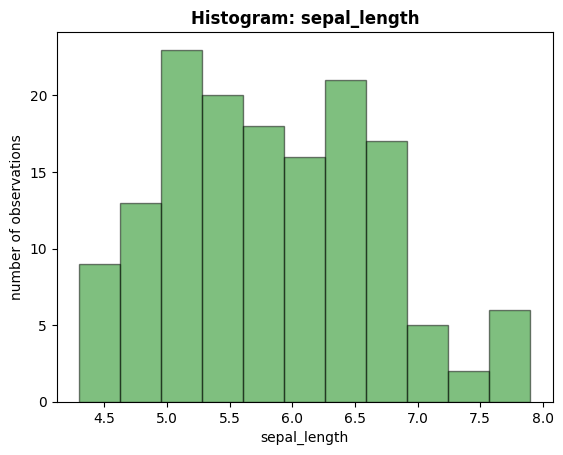

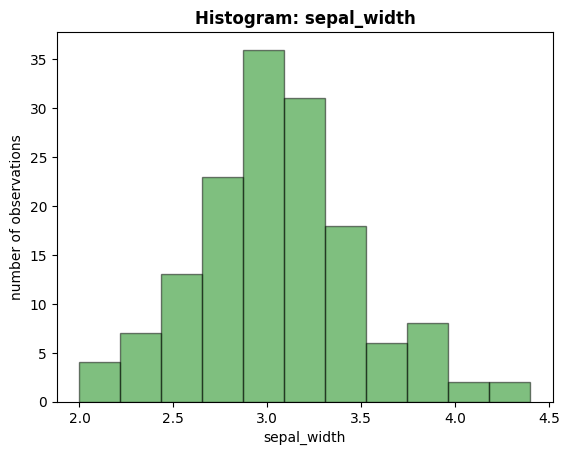

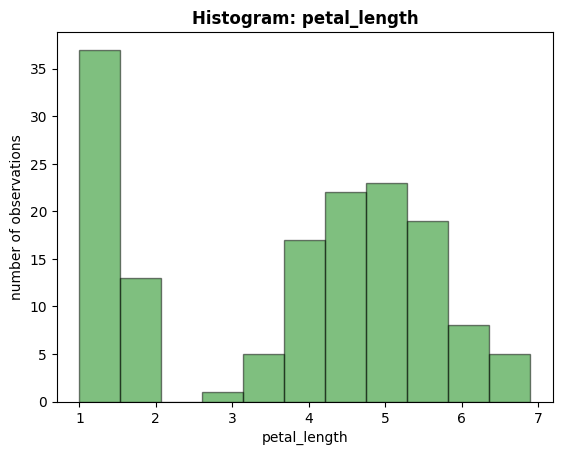

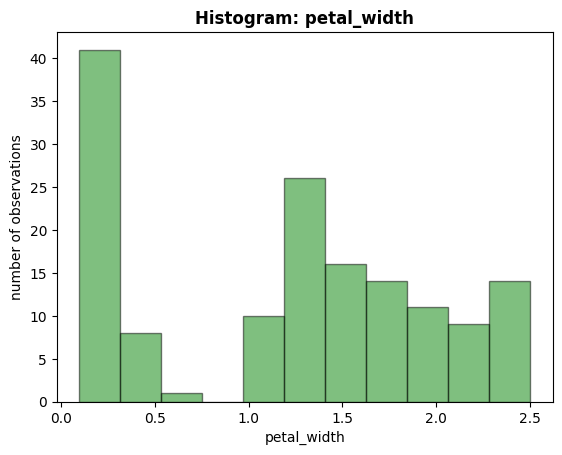

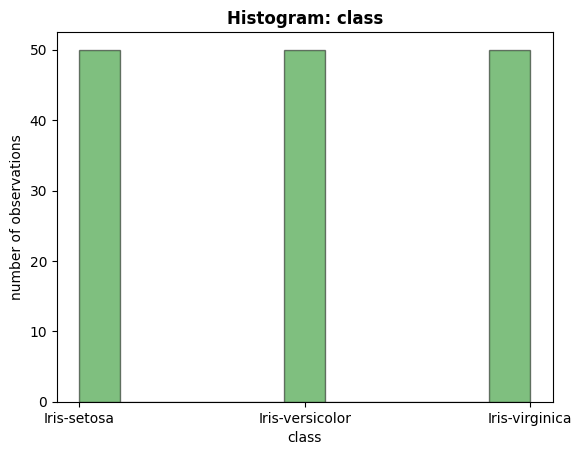

In [19]:
from matplotlib import pyplot as plt

for column in tableau.columns:
    # Create histograms
    plt.figure()
    plt.hist(tableau[column],bins = 11, alpha = 0.5, color = 'green', edgecolor = 'black')

    # Add labels and title
    plt.xlabel(column)
    plt.ylabel('number of observations')
    plt.title(f'Histogram: {column}', fontweight='bold')
    
    # Save histograms to png files
    plt.savefig(f'Histogram of {column}.png')
    plt.show()




A part from 'sepal_width', the histograms of other variables give us very little information. To investigate more, I created histogram of each variable grouped by spieces. 

To improve visualisation, I chose 'step' as the type of histogram by using `histtypes`, this type generates a lineplot that is by default unfilled. The histogram of each spiece is styled differently by using the following parameters: `edgecolor`, `lingwidth`. 

<ins>Ressources:<ins>

- [Plot histograms by group](https://www.statology.org/pandas-histogram-by-group/)
- [Setting properties for each dataset](https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html#linestyle)

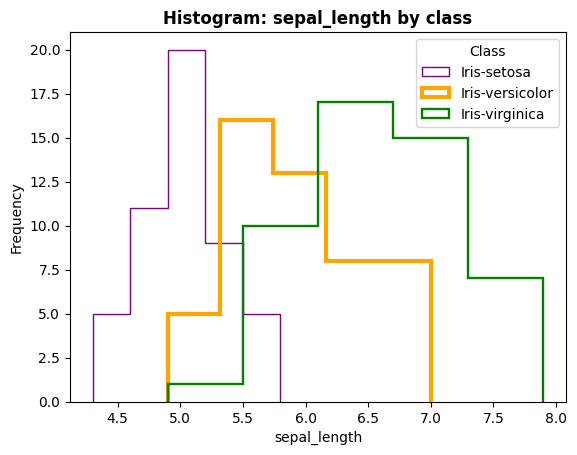

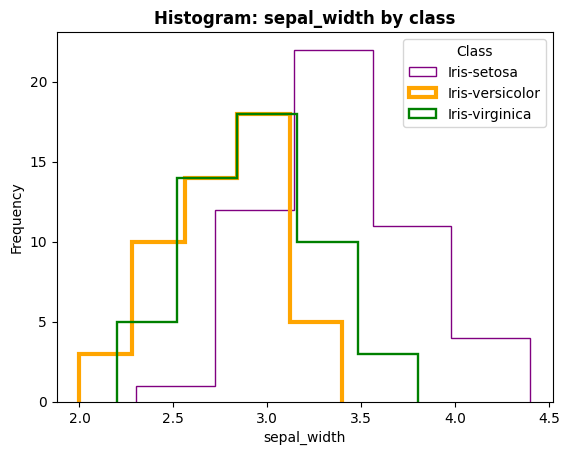

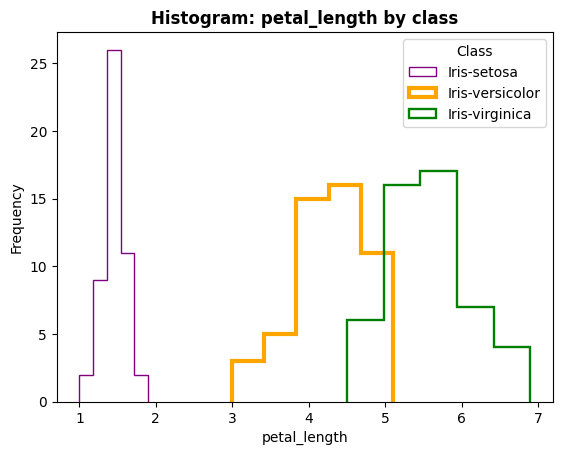

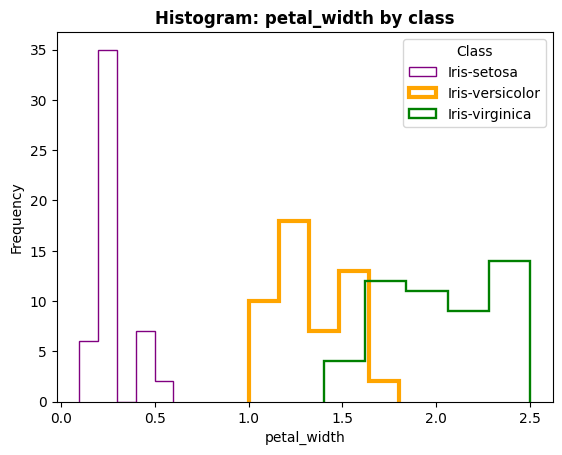

In [34]:
from matplotlib import pyplot as plt

plt.figure()

for column in tableau.iloc[:,:4]:
    #define points values by group
    A = tableau.loc[tableau['class'] == 'Iris-setosa', column]
    B = tableau.loc[tableau['class'] == 'Iris-versicolor', column]
    C = tableau.loc[tableau['class'] == 'Iris-virginica', column]
    
    #add three histograms to one plot
    plt.hist(A, bins=5, label='Iris-setosa', edgecolor = 'purple', histtype="step")
    plt.hist(B, bins=5, label='Iris-versicolor', edgecolor = 'orange', linewidth=3, histtype="step")
    plt.hist(C, bins=5, label='Iris-virginica', edgecolor = 'green', linewidth=1.7, histtype="step")

    #add plot title and axis labels
    plt.title(f'Histogram: {column} by class', fontweight='bold')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    #add legend
    plt.legend(title='Class')

    #display plot
    plt.show()




### 3. Outputs a scatter plot of each pair of variables.

<ins>Ressources:<ins>
- [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- [Add title for pairplot](https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid)

Text(0.5, 1.02, 'Pair Plot - Iris Dataset')

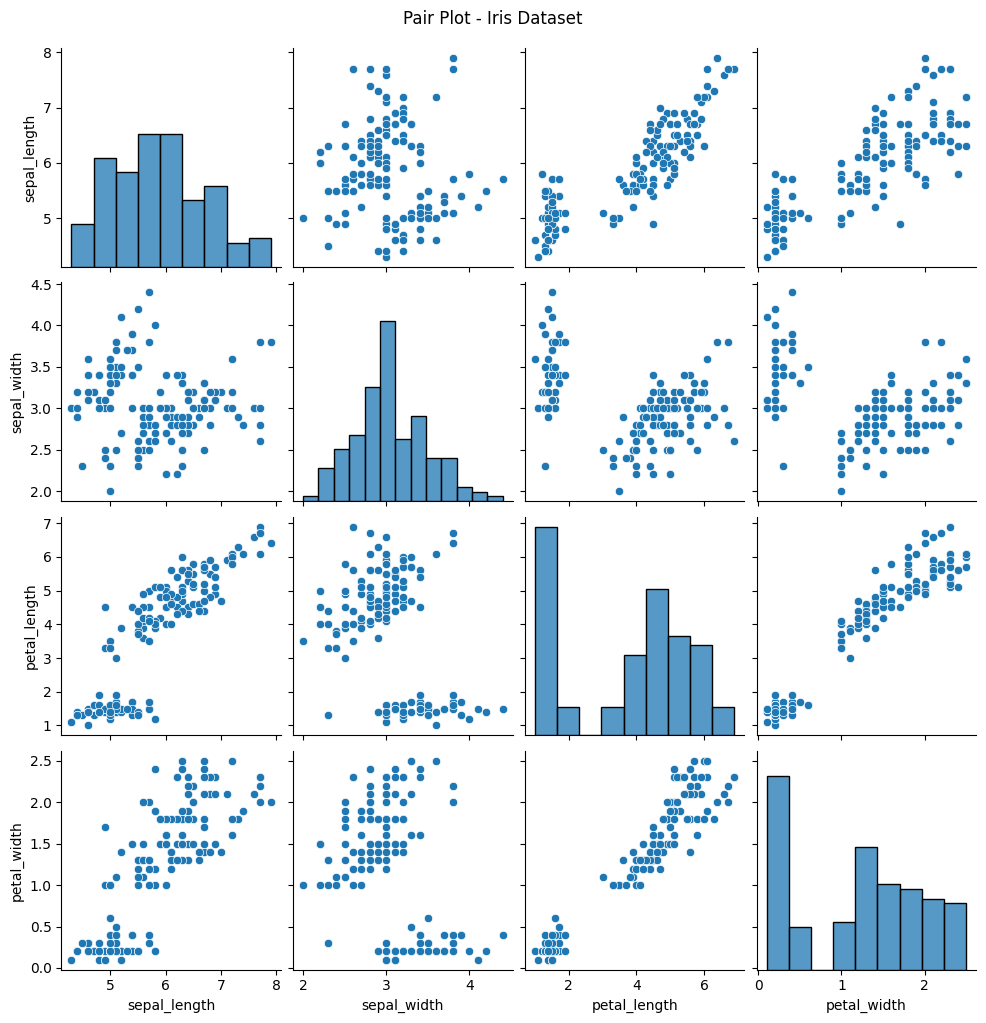

In [35]:
# Seaborn visualization library
import seaborn as sns

# Create pairplot
sns.pairplot(tableau)
# Add title
plt.suptitle('Pair Plot - Iris Dataset', y=1.02)

### 4. Performs any other analysis you think is appropriate

- Pair plot grouped by class

Text(0.5, 1.02, 'Pair Plot group by class - Iris Dataset')

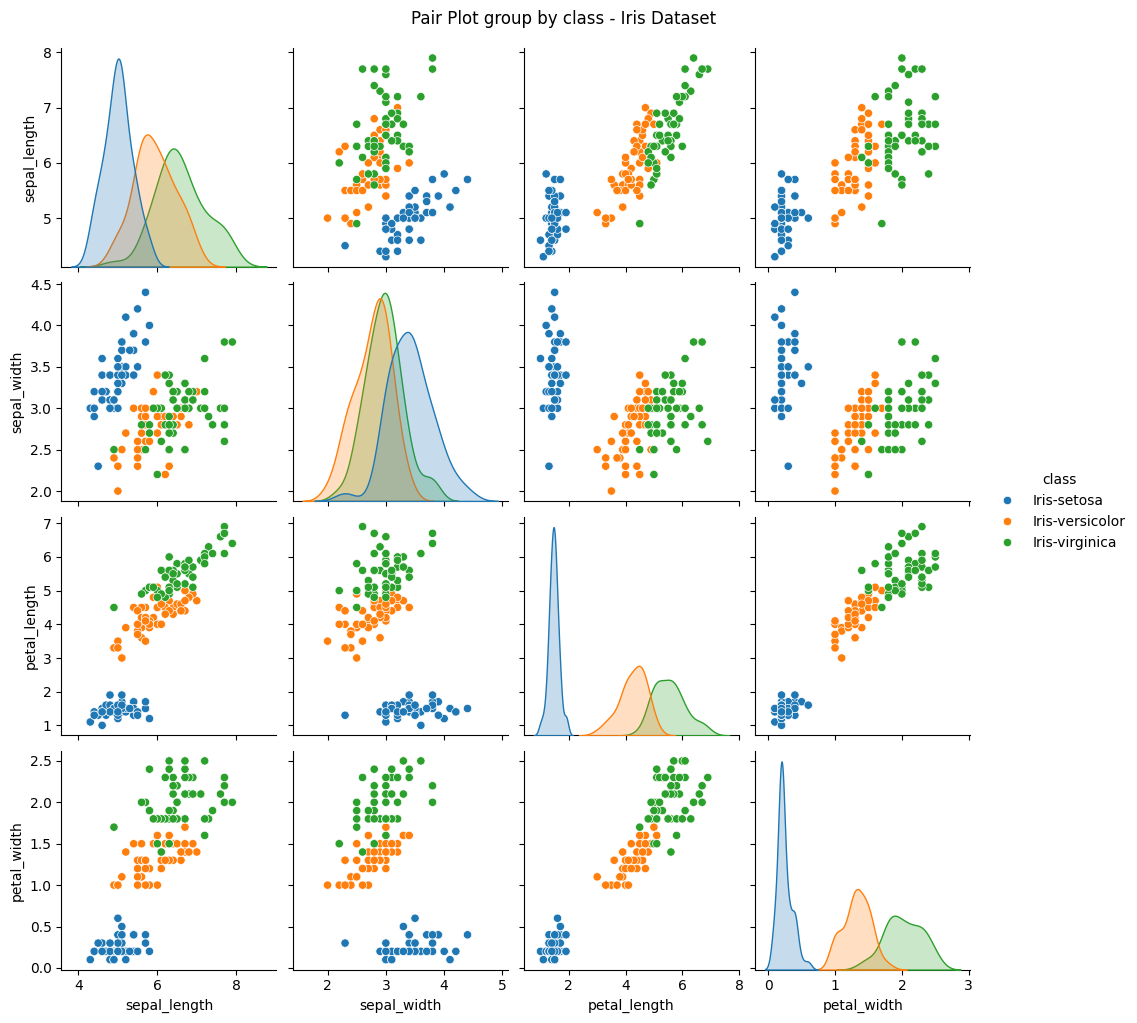

In [9]:
# Create the pairplot, with observations grouped by class by using parameter hue='class'
sns.pairplot(tableau, hue="class")
# Add title
plt.suptitle('Pair Plot group by class - Iris Dataset', y=1.02)

- Find the relationship between the variables

              sepal_length  sepal_width  petal_length  petal_width
sepal_length          1.00        -0.11          0.87         0.82
sepal_width          -0.11         1.00         -0.42        -0.36
petal_length          0.87        -0.42          1.00         0.96
petal_width           0.82        -0.36          0.96         1.00


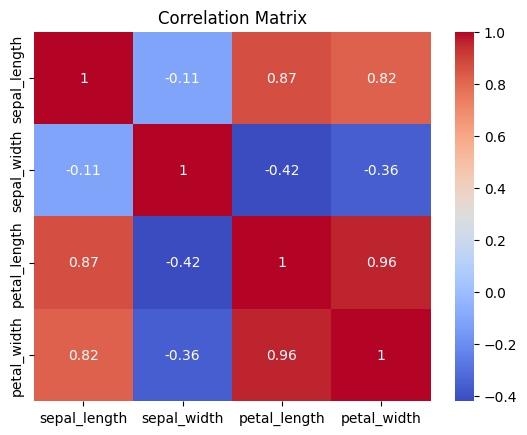

In [10]:
# Calculate correlation coefficients using corr()
# Correlation is calculated between 2 numeric variables
# --> only select the first 4 columns of tableau
# Using round() to round the output to 2 decimals

correlation = round(tableau.iloc[:,:4].corr(), 2)
print(correlation)

# Heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix")
plt.show()

# Ressources

# Correlation 
# https://www.w3schools.com/python/pandas/pandas_correlations.asp
# Select columns
# https://stackoverflow.com/questions/69389551/selecting-first-n-columns-and-last-n-columns-with-pandas
# Round a number
# https://www.datacamp.com/tutorial/python-round-to-two-decimal-places?utm_source=google&utm_medium=paid_search&utm_campaignid=19589720821&utm_adgroupid=157156375191&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=733936221335&utm_targetid=dsa-2218886984100&utm_loc_interest_ms=&utm_loc_physical_ms=1007850&utm_content=ps-other~emea-en~dsa~tofu~tutorial-python&accountid=9624585688&utm_campaign=230119_1-ps-other~dsa~tofu_2-b2c_3-emea_4-prc_5-na_6-na_7-le_8-pdsh-go_9-nb-e_10-na_11-na&gad_source=1&gbraid=0AAAAADQ9WsF1hzxbmK0vUJ9CXlZzNVybB&gclid=CjwKCAjwn6LABhBSEiwAsNJrjmipMQ_0GHPpgyGkWG_t1ArfF_lTQY7UlldnmTR5n5f1bfXQCaxJ2xoCStYQAvD_BwE


- Analyse the distribution of 4 quantitative variables

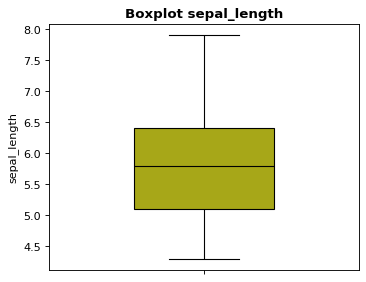

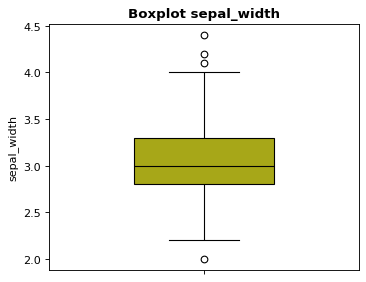

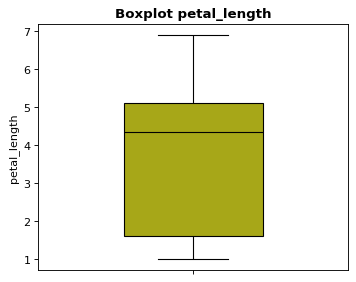

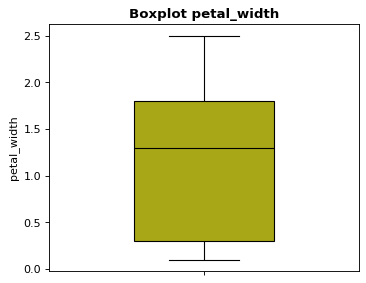

In [11]:
# Create the box plot by using boxplot()
# --> only select the first 4 columns of tableau
from matplotlib.pyplot import figure

for column in tableau.iloc[:,:4]:
    figure(figsize=(5, 4), dpi=80)
    sns.boxplot(data=tableau, y = tableau[column], fill=True, dodge='auto', width=0.5, gap=0.1, whis=1.5, linecolor='k', color='y')
    
    # Add labels and title
    plt.ylabel(column)
    plt.title(f'Boxplot {column}', fontweight='bold')

# Ressources
# https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib
# Boxplot
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

- Analyse class distribution: Create box-plots of the 4 quantitative variables for each of the three classes.

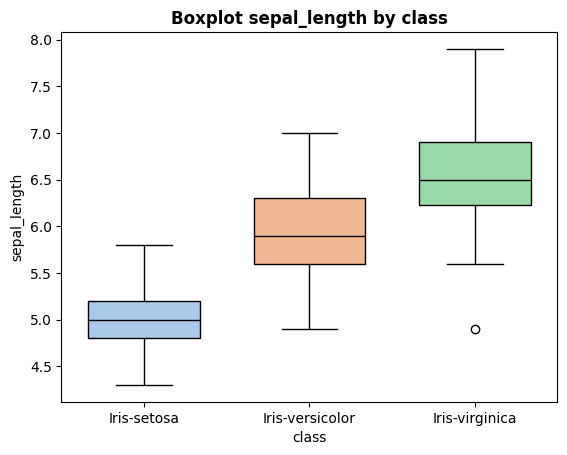

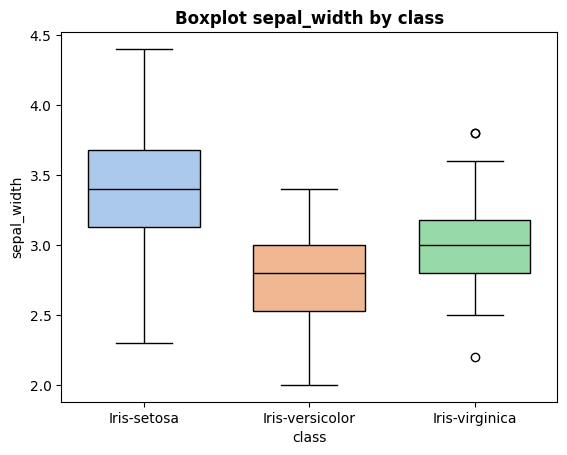

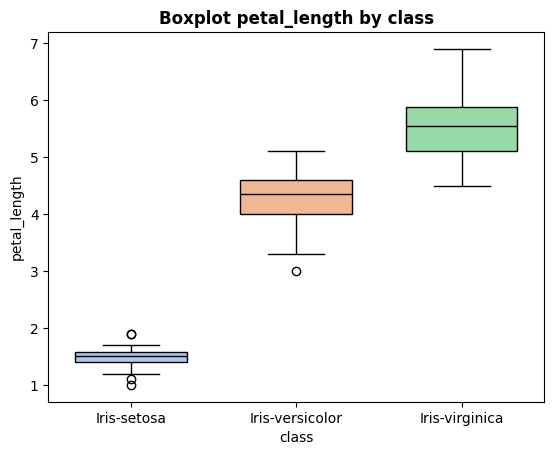

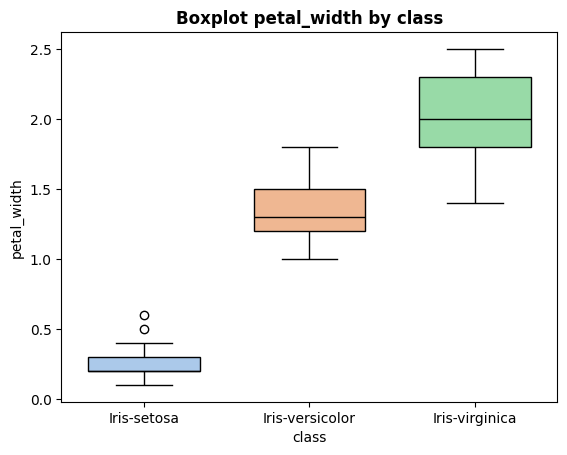

In [12]:
# Create the box plot by using boxplot()
# --> only select the first 4 columns of tableau

for column in tableau.iloc[:,:4]:
    plt.figure()
    sns.boxplot(data=tableau, x = 'class', y = tableau[column], hue='class', orient='v', palette='pastel',fill=True, dodge='auto', width=0.75, gap=0.1, whis=1.5, linecolor='k')
    
    # Add labels and title
    plt.xlabel('class')
    plt.ylabel(column)
    plt.title(f'Boxplot {column} by class', fontweight='bold')

